![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,s,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,g,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,g,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,g,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,g,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,g,1442,+


## Objetivos


Use supervised learning techniques to automate the credit card approval process for banks.

- Preproccess the data and apply supervised learning techniques to find the best model and parameters for the job. Save the accuracy score from your best model as a numeric variable, best_score. 

- Aim for an accuracy score of at least **0.75**. The target variable is the last column of the DataFrame.

## Minha solução

In [2]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


Irei realizar um modelo de regressão logística, já que é um dos mais simples e talvez já seja suficiente para alcançar a precisão. 

A ideia é obter um outcome para classificar os dados em True (1 ou `'+'` ou `'aprovado'`) ou False (0 ou `'-'` ou `'aprovado'`)

- Não há missing values descritos por `np.NaN`
  - Os missing values foram identificado no dataset como strings '?'

- Alterando dtypes
  - Coluna '1' está como object -> transformar para float
  - As demais numéricas(float e int) já estão no dtype adequado

- LogisticRegression -> preprocessamento

  - StandardScaler nas variáveis numéricas

  - get_dummies() nas variáveis 0, 3-6, 8-9 e 11?


### Limpeza e Tratamento inicial dos dados

In [3]:
cc_apps.columns = ['var_'+str(i) for i in cc_apps.columns] #trabalhar com var_0, var_1, var_2 para melhor visualização

# visualizando se não há mesmo missing values com isna() e isnull()
print(cc_apps.isna().sum())
print(f'\n\n{cc_apps.isnull().sum()}')

# visualizando a distribuição dos dados mais frequentes das colunas
for col in cc_apps.columns:
    print(col)
    print('-------------')
    print(cc_apps[col].value_counts())

var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
dtype: int64


var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
dtype: int64
var_0
-------------
var_0
b    468
a    210
?     12
Name: count, dtype: int64
var_1
-------------
var_1
?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: count, Length: 350, dtype: int64
var_2
-------------
var_2
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: count, Length: 215, dtype: int64
var_3
-------------
var_3
u    519
y    163
?      6
l      2
Name: count, dtype: int64
var_4
-------------
var_4
g     519
p     163
?       6
gg      

Observações sobre a coluna 1 (**PARTICULARIDADE**):

Coluna var_1 é float, portanto assume-se um comportamento contínuo. Nesse caso, será suposto que os valores faltantes possam ser representados adequadamente pela média (admitindo que não são outliers ou valores extremos).

Como a frequência desses dados é maior que as demais (sendo '?' a moda), é preciso de cuidado e ao fazer essa substituição!

Seria interessante ter uma forma de fazer a validação desse tipo de coisa, mas como não se tem uma noção geral de que valores podem ser assumidos, a outra opção seria descartas esses dados.

Num primeiro momento manteremos como a média. Caso o resultado não seja satisfatório, pode-se alterar a forma de lidar com esses dados nulos para tentar obter uma melhor predição...

In [4]:
cc_apps_filled = cc_apps.copy()
print(cc_apps_filled.head(5)) #certificando de que a cópia está correta antes de rodar o loop

# para cada coluna, identificar os valores '?' e substituir pela moda
for col in cc_apps_filled:
    # OBS -> colunas de object podem, na teoria, ter como moda valor '?'; se tiver, substituir pela 2ª moda (checar individualmente)
    
    # limpando as colunas de dtype object
    if cc_apps_filled[col].dtype == 'object':
        mode_val = cc_apps_filled[col].value_counts().iloc[0] 
        
        
        # checando se a moda é '?'. Se for, substituir pela 2ª moda
        if mode_val == '?': 
            cc_apps_filled[col] = cc_apps_filled[col].replace('?', cc_apps_filled[col].value_counts().iloc[1])
        
        if col == 'var_1':
            cc_apps_filled[col] = cc_apps_filled[col].replace('?', np.nan)
            cc_apps_filled[col] = pd.to_numeric(cc_apps['var_1'].values, errors='coerce')
            col_mean = cc_apps_filled[col].mean()
            print(f'mean of {col}: {col_mean}')       
            
            # preenchendo os valores ausentes (np.nan) com a média -> substituir apenas essa parte para remover os dados ausentes dessa coluna no futuro
            cc_apps_filled[col] = cc_apps_filled[col].fillna(col_mean)
     
        # Caso a moda não seja '?' e não esteja na anomalia da coluna var_1, substituir direto pelo valor mais frequente (moda)  
        else: 
            cc_apps_filled[col] = cc_apps_filled[col].replace('?', mode_val)   
        
    else: # Se não for object, no DF será float/int
        cc_apps_filled[col] = cc_apps_filled[col].replace('?', np.nan)
        col_mean = cc_apps_filled[col].mean()        
        print(f'mean of {col}: {col_mean}')
        cc_apps_filled[col] = cc_apps_filled[col].fillna(col_mean)
        
# substituindo '+' e '-' da variável target por 1 e 0
cc_apps_filled['var_13'] = cc_apps_filled['var_13'].apply(lambda x: 1 if x == '+' else 0)


#Verificando os dados após o preenchimento
for col in cc_apps_filled.columns:
    print(col)
    print('-------------')
    print(cc_apps_filled[col].value_counts())

  var_0  var_1  var_2 var_3 var_4 var_5 var_6  var_7 var_8 var_9  var_10  \
0     b  30.83  0.000     u     g     w     v   1.25     t     t       1   
1     a  58.67  4.460     u     g     q     h   3.04     t     t       6   
2     a  24.50  0.500     u     g     q     h   1.50     t     f       0   
3     b  27.83  1.540     u     g     w     v   3.75     t     t       5   
4     b  20.17  5.625     u     g     w     v   1.71     t     f       0   

  var_11  var_12 var_13  
0      g       0      +  
1      g     560      +  
2      g     824      +  
3      g       3      +  
4      s       0      +  
mean of var_1: 31.56817109144543
mean of var_2: 4.758724637681159
mean of var_7: 2.223405797101449
mean of var_10: 2.4
mean of var_12: 1017.3855072463768
var_0
-------------
var_0
b      468
a      210
468     12
Name: count, dtype: int64
var_1
-------------
var_1
31.568171    12
22.670000     9
20.420000     7
18.830000     6
24.500000     6
             ..
48.250000     1
28.330000 

In [5]:
cc_apps_filled_dummies = cc_apps_filled.copy()

# dummies nas colunas 0, 3-6, 8-9 e 11 -> poderia filtrar por dtype object, mas como já sabemos quais são, da pra selecionar direto
cols_to_dummies = ['var_0', 'var_3', 'var_4', 'var_5', 'var_6','var_8','var_9','var_11']
cols_to_num = ['var_1',	'var_2', 'var_7', 'var_10', 'var_12']

cc_apps_filled_dummies = pd.get_dummies(data=cc_apps_filled_dummies,columns=cols_to_dummies, drop_first=True)
cc_apps_filled_dummies.head(10)
print(cc_apps_filled_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var_1     690 non-null    float64
 1   var_2     690 non-null    float64
 2   var_7     690 non-null    float64
 3   var_10    690 non-null    int64  
 4   var_12    690 non-null    int64  
 5   var_13    690 non-null    int64  
 6   var_0_a   690 non-null    bool   
 7   var_0_b   690 non-null    bool   
 8   var_3_l   690 non-null    bool   
 9   var_3_u   690 non-null    bool   
 10  var_3_y   690 non-null    bool   
 11  var_4_g   690 non-null    bool   
 12  var_4_gg  690 non-null    bool   
 13  var_4_p   690 non-null    bool   
 14  var_5_aa  690 non-null    bool   
 15  var_5_c   690 non-null    bool   
 16  var_5_cc  690 non-null    bool   
 17  var_5_d   690 non-null    bool   
 18  var_5_e   690 non-null    bool   
 19  var_5_ff  690 non-null    bool   
 20  var_5_i   690 non-null    bool  

### Preparando para aplicar o modelo de ML

In [6]:
cc_apps_preprocessed = cc_apps_filled_dummies.copy()

data_cols = cc_apps_preprocessed.drop('var_13', axis=1).columns

# Apenas as colunas dummy são do tipo boolean nesse problema, então podemos filtrar por este tipo de dtype
dummy_cols = cc_apps_preprocessed.select_dtypes(include=['boolean']).columns
num_cols = cc_apps_preprocessed.drop(dummy_cols, axis=1).drop('var_13', axis=1).columns

y = cc_apps_preprocessed['var_13'].values

data_cols.shape #vendo qtd de colunas de dados sem o target

(40,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cc_apps_preprocessed[data_cols], y, test_size=0.2, random_state=42)

# checando se o shape está correto (40 colunas de dados para datasets de X)
print(f'{X_train.head(10)}\n{X_train.shape}\n\n{X_test.head(10)}\n{X_test.shape}\n\n{y_train[:10]}\n{y_train.shape}\n\n{y_test[:10]}\n{y_test.shape}')

     var_1   var_2  var_7  var_10  var_12  var_0_a  var_0_b  var_3_l  var_3_u  \
278  24.58  13.500  0.000       0       0    False     True    False    False   
110  29.17   3.500  3.500       3       0    False     True    False     True   
82   39.83   0.500  0.250       0       0    False     True    False     True   
51   26.00   1.000  1.750       0       0    False     True    False     True   
218  53.92   9.625  8.665       5       0    False     True    False     True   
552  34.75  15.000  5.375       9     134    False     True    False     True   
446  16.50   0.125  0.165       0       0    False     True    False     True   
292  25.42   0.540  0.165       1     444    False     True    False     True   
314  16.25   0.000  0.250       0       0    False     True    False    False   
534  31.83   2.500  7.500       0       0    False     True    False     True   

     var_3_y  ...  var_6_h  var_6_j  var_6_n  var_6_o  var_6_v  var_6_z  \
278     True  ...    False    Fal

In [8]:
# Segregando os dados numéricos e dummy para fazer o scaling apenas dos numéricos

X_train_num = X_train[num_cols]
X_train_dummy = X_train[dummy_cols]
X_test_num = X_test[num_cols]
X_test_dummy = X_test[dummy_cols]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_num_train = scaler.fit_transform(X_train_num)
X_scaled_num_test = scaler.transform(X_test_num)

X_scaled_num_train_df = pd.DataFrame(X_scaled_num_train, columns=num_cols, index=X_train_num.index)
X_scaled_num_test_df = pd.DataFrame(X_scaled_num_test, columns=num_cols, index=X_test_num.index)

# Juntando os dados numéricos escalados com os dummy (tanto no traning quanto no test datasets)

X_scaled_train_global = pd.concat([X_scaled_num_train_df, X_train_dummy], axis=1)
X_scaled_test_global = pd.concat([X_scaled_num_test_df, X_test_dummy], axis=1)

#Visualizando 
print(X_scaled_train_global.head(10))
print(X_scaled_test_global.head(10))

print(X_scaled_train_global.shape, y_train.shape)


        var_1     var_2     var_7    var_10    var_12  var_0_a  var_0_b  \
278 -0.586578  1.852077 -0.701236 -0.495033 -0.192364    False     True   
110 -0.195745 -0.229966  0.497087  0.123665 -0.192364    False     True   
82   0.711940 -0.854579 -0.615641 -0.495033 -0.192364    False     True   
51  -0.465667 -0.750477 -0.102075 -0.495033 -0.192364    False     True   
218  1.911685  1.045285  2.265469  0.536130 -0.192364    False     True   
552  0.279384  2.164384  1.139045  1.361059 -0.164348    False     True   
446 -1.274579 -0.932655 -0.644743 -0.495033 -0.192364    False     True   
292 -0.515053 -0.846250 -0.644743 -0.288800 -0.099535    False     True   
314 -1.295867 -0.958681 -0.615641 -0.495033 -0.192364    False     True   
534  0.030750 -0.438170  1.866598 -0.495033 -0.192364    False     True   

     var_3_l  var_3_u  var_3_y  ...  var_6_h  var_6_j  var_6_n  var_6_o  \
278    False    False     True  ...    False    False    False    False   
110    False     True   

Aplicando modelo de regressão logística

In [10]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_scaled_train_global, y_train)
y_train_pred = logreg.predict(X_scaled_train_global)
y_train_score = logreg.score(X_scaled_train_global, y_train)
print(f'Score do modelo no treinamento defaultado: {y_train_score}')

Score do modelo no treinamento defaultado: 0.8985507246376812


In [11]:
from sklearn.model_selection import GridSearchCV

# hiperparametros para o gridsearch
# C definido para variar o parâmetro C de 10*exp(-4) até 10*exp(4)
param_grid = {'C': np.logspace(-4, 4, 20),
              'penalty': ['l2'],
              'solver': ['liblinear', 'lbfgs', 'newton-cg'],
              'tol': [0.01, 0.001, 0.0001],
              'max_iter': [10000]
              }

grid_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_cv.fit(X_scaled_train_global, y_train)

best_score = grid_cv.best_score_
best_params = grid_cv.best_params_
print(f'melhores parâmetros {best_params} -> melhor escore de treinamento com gridsearch: {best_score}')


melhores parâmetros {'C': 11.288378916846883, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01} -> melhor escore de treinamento com gridsearch: 0.8804095004095004


Melhor escore encontrado aplicado no dataset de teste: 0.8405797101449275


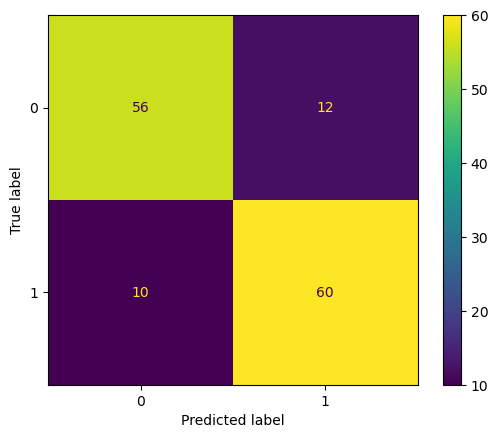

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid_cv.best_estimator_
y_test_pred = best_model.predict(X_scaled_test_global)
best_score = best_model.score(X_scaled_test_global, y_test)
conf_mtx = confusion_matrix(y_test, y_test_pred)
print(ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=best_model.classes_).plot())
print(f'Melhor escore encontrado aplicado no dataset de teste: {best_score}')


## Solução ("Gabarito")

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None)

In [ ]:
# Replace the '?'s with NaN in dataset
cc_apps_nans_replaced = cc_apps.replace("?", np.NaN)

# Create a copy of the NaN replacement DataFrame
cc_apps_imputed = cc_apps_nans_replaced.copy()

# Iterate over each column of cc_apps_nans_replaced and impute the most frequent value for object data types and the mean for numeric data types
for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        # Impute with the most frequent value
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(
            cc_apps_imputed[col].value_counts().index[0]
        )
    else:
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(cc_apps_imputed[col].mean())

In [ ]:
# Dummify the categorical features
cc_apps_encoded = pd.get_dummies(cc_apps_imputed, drop_first=True)

# Extract the last column as your target variable
X = cc_apps_encoded.iloc[:, :-1].values
y = cc_apps_encoded.iloc[:, [-1]].values

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [ ]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Use logreg to predict instances from the training set
y_train_pred = logreg.predict(rescaledX_train)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_train, y_train_pred))

[[203   1]
 [  1 257]]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
best_score =  best_model.score(rescaledX_test, y_test)

print("Accuracy of logistic regression classifier: ", best_score)

Best: 0.818256 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.7982456140350878
